In [1]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u
from astropy import constants as c
from scipy.integrate import quad

In [2]:
def n_air(nu, P=101325, T=298):

    return 1 + 7.75e-7 * (1 + 8.36e-32 * nu**2) * P/T

In [3]:
def d2Edxdnu(nu, beta, q=1.602e-19, mu=1.00000037*c.mu0.value):

    return np.pi * q ** 2 * mu * nu * (1 - 1 / (beta * n_air(nu))**2)

In [4]:
def d2Ndxdnu(nu, beta, q=1.602e-19, mu=1.00000037*c.mu0.value):

    return np.pi * q ** 2 * mu /c.h.value * (1 - 1 / (beta * n_air(nu))**2)

In [5]:
def dEdx(nu_low, nu_high, beta, q=1.602e-19, mu=1.00000037*c.mu0.value):

    return quad(d2Edxdnu, nu_low, nu_high, args=(beta, q, mu))[0]

In [6]:
def dNdx(nu_low, nu_high, beta, q=1.602e-19, mu=1.00000037*c.mu0.value):

    return quad(d2Ndxdnu, nu_low, nu_high, args=(beta, q, mu))[0]

In [7]:
def get_beta(E, m=c.m_e.value):

    return np.sqrt(1 - m**2 * c.c.value**4 / E**2)

In [8]:
# Minimum muon energy (in GeV) to emit Cherenkov radiation in air
(1 - 1.0003**-2)**-0.5 * 1.8835e-28 * c.c.value**2 * u.J.to(u.GeV)

4.314383145048441

In [9]:
# # Shower energy drop

# E = 1  # starting gamma energy in TeV

# E /= 2
# bet = get_beta(E * u.TeV.to(u.J))

# n = 1
# while bet > 1/1.0003:
#     print(n, '--', E, 'TeV: beta =', bet)
#     n += 1
#     E /= 2
#     bet = get_beta(E * u.TeV.to(u.J))

In [10]:
freqs = np.logspace(12, 15.2, 10000)

In [11]:
beta = get_beta(E=1 * u.TeV.to(u.J), m=1.8835e-28)  # 1-TeV muon

In [12]:
log_lam = np.arange(-4, -7, -1)
log_lam

array([-4, -5, -6])

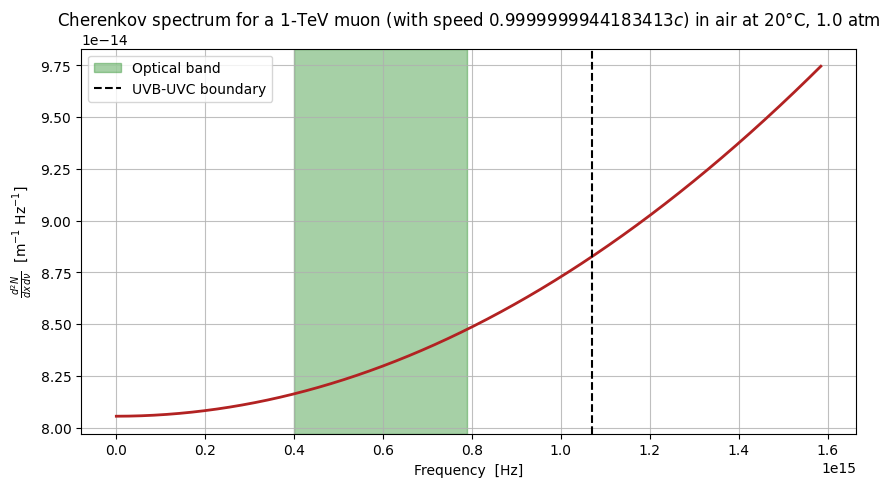

In [13]:
plt.figure(figsize=(10, 5))

plt.plot(freqs, d2Ndxdnu(freqs, beta), c='firebrick', lw=2)
plt.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
plt.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

plt.grid(alpha=0.8)
plt.xlabel('Frequency  [Hz]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
plt.title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 20°C, 1.0 atm')

plt.legend()
plt.show()

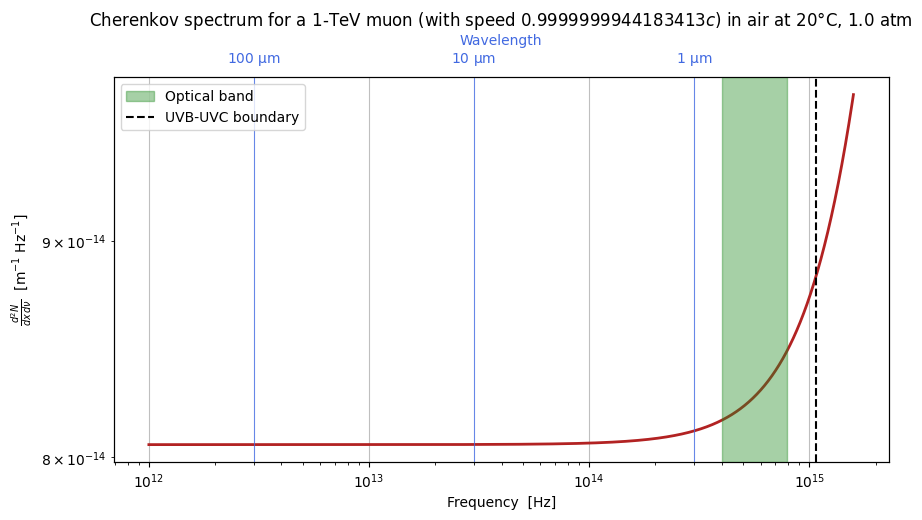

In [14]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(freqs, d2Ndxdnu(freqs, beta), c='firebrick', lw=2)
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
ax1.set_title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax2.legend(loc='upper left')
plt.show()

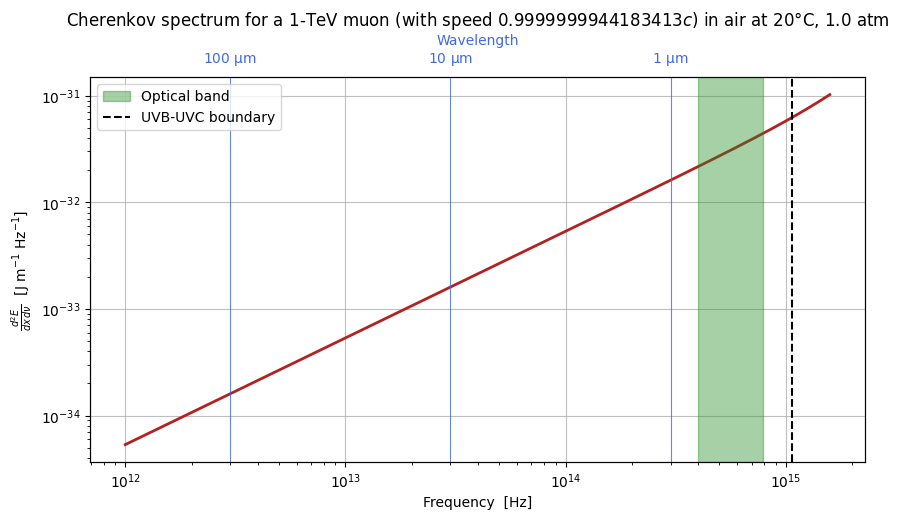

In [15]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(freqs, d2Edxdnu(freqs, beta), c='firebrick', lw=2)
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2E}{dx\,d\nu}$  [J m$^{-1}$ Hz$^{-1}$]')
ax1.set_title('Cherenkov spectrum for a 1-TeV muon (with speed ' + str(beta) + r'$c$) in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax2.legend(loc='upper left')
plt.show()

In [16]:
total_N = dNdx(0, 1.1e15, beta)
print('Number of Cherenkov photons emitted per meter by a muon travelling through air with speed '
      + str(beta) + 'c:', total_N)

Number of Cherenkov photons emitted per meter by a muon travelling through air with speed 0.9999999944183413c: 91.59452395083609


In [17]:
total_E = dEdx(0, 1.1e15, beta)
print('Total energy radiated per meter by a muon travelling through air with speed '
      + str(beta) + 'c:', total_E, 'J')

Total energy radiated per meter by a muon travelling through air with speed 0.9999999944183413c: 3.392434204588129e-17 J


In [18]:
energies = np.array([4.5, 5, 6, 10, 100])  # GeV
betas = get_beta(E=energies * u.GeV.to(u.J), m=1.8835e-28)  # muons
betas

array([0.99972432, 0.99977671, 0.99984494, 0.99994418, 0.99999944])

In [19]:
(1 - betas[-1]**2)**-0.5

946.462395297162

In [20]:
clrs = ['firebrick', 'gold', 'dodgerblue', 'blueviolet', 'fuchsia']

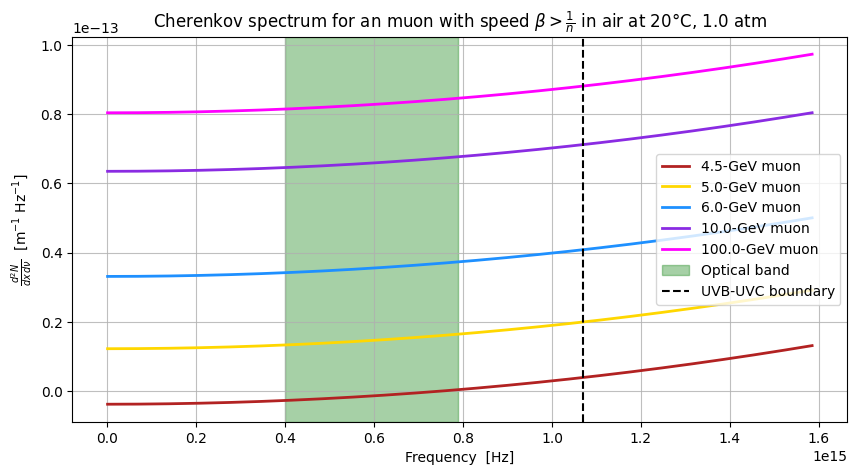

In [21]:
plt.figure(figsize=(10, 5))

for i, b in enumerate(betas):
    plt.plot(freqs, d2Ndxdnu(freqs, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
plt.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
plt.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

plt.grid(alpha=0.8)
plt.xlabel('Frequency  [Hz]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 20°C, 1.0 atm')

plt.legend()
plt.show()

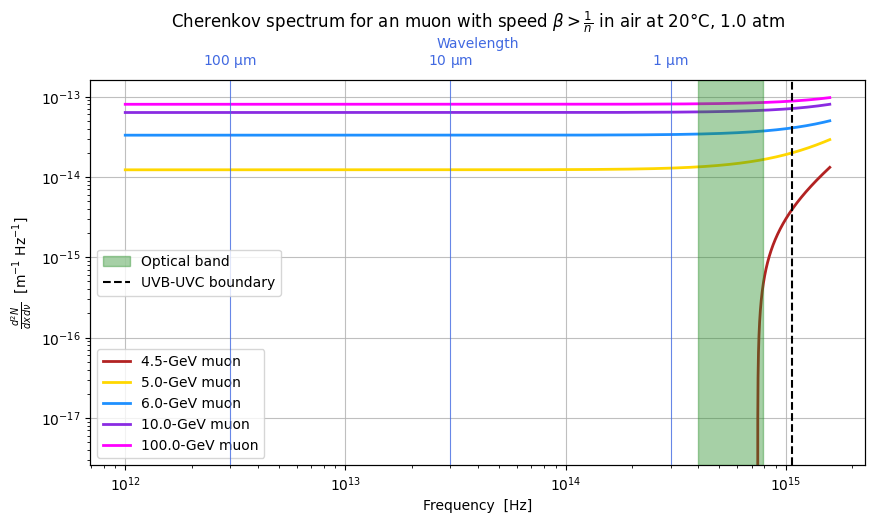

In [22]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for i, b in enumerate(betas):
    ax1.plot(freqs, d2Ndxdnu(freqs, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax1.legend(loc='lower left')
ax2.legend(loc='center left')
plt.show()

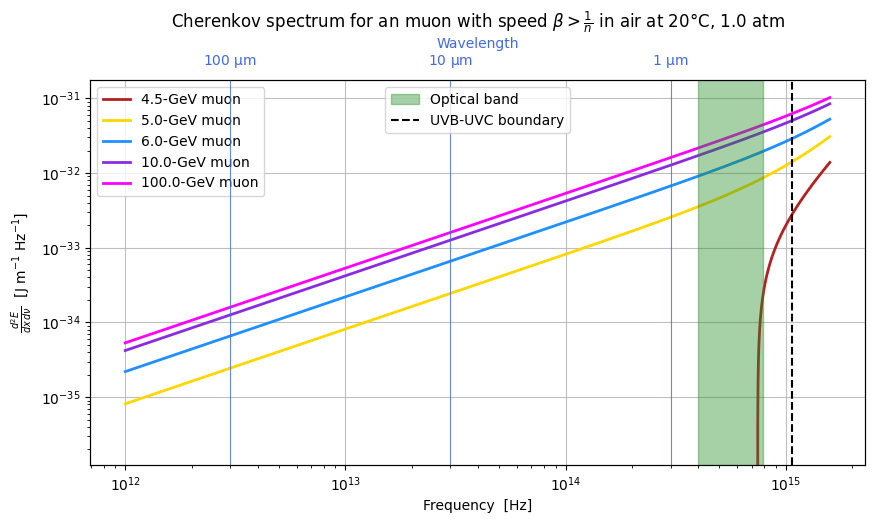

In [23]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

for i, b in enumerate(betas):
    ax1.plot(freqs, d2Edxdnu(freqs, b), c=clrs[i], lw=2, label=str(energies[i]) + '-GeV muon')
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2E}{dx\,d\nu}$  [J m$^{-1}$ Hz$^{-1}$]')
plt.title(r'Cherenkov spectrum for an muon with speed $\beta > \frac{1}{n}$ in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
plt.show()

In [24]:
def d2Edxdnu_MM(nu, beta, mu=1.00000037*c.mu0.value):

    return np.pi * 1.602e-19 ** 2 * mu * nu * (1 - 1 / (beta * n_air(nu))**2) * (n_air(nu) / (2 * c.alpha)) ** 2

In [25]:
def d2Ndxdnu_MM(nu, beta, mu=1.00000037*c.mu0.value):

    return np.pi * 1.602e-19 ** 2 * mu /c.h.value * (1 - 1 / (beta * n_air(nu))**2) * (n_air(nu) / (2 * c.alpha)) ** 2

In [26]:
def dEdx_MM(nu_low, nu_high, beta, mu=1.00000037*c.mu0.value):

    return quad(d2Edxdnu_MM, nu_low, nu_high, args=(beta, mu))[0]

In [27]:
def dNdx_MM(nu_low, nu_high, beta, mu=1.00000037*c.mu0.value):

    return quad(d2Ndxdnu_MM, nu_low, nu_high, args=(beta, mu))[0]

In [28]:
gamma = (1 - 1.0003**-2)**-0.5
gamma

40.8340140588854

In [29]:
# pick gamma = 1e3
# e.g. MM with mass 1e5 GeV, requires E = 1e8 GeV
# MM with mass 1e8 GeV, requires E = 1e11 GeV, etc.

In [30]:
beta_MM = get_beta(E=1e11 * u.GeV.to(u.J), m=(1e8 * c.c**-2 *u.GeV).to(u.kg).value) 

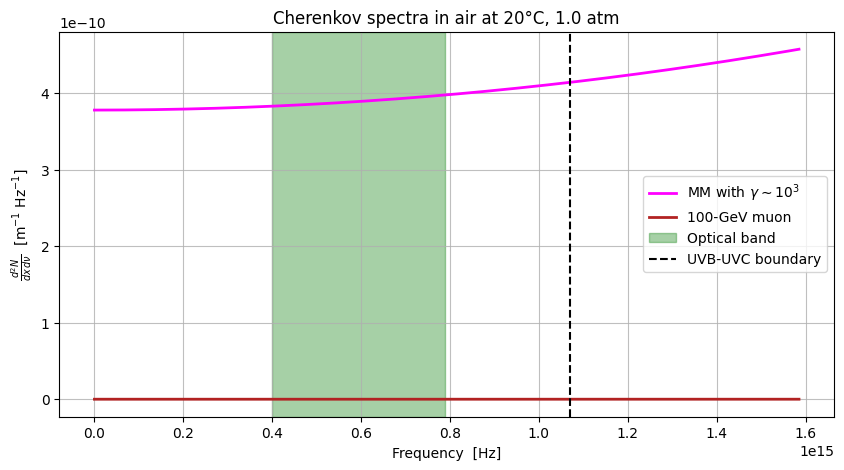

In [31]:
plt.figure(figsize=(10, 5))

plt.plot(freqs, d2Ndxdnu_MM(freqs, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
plt.plot(freqs, d2Ndxdnu(freqs, betas[-1]), c='firebrick', lw=2, label=r'100-GeV muon')
plt.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
plt.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

plt.grid(alpha=0.8)
plt.xlabel('Frequency  [Hz]')
plt.ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
plt.title('Cherenkov spectra in air at 20°C, 1.0 atm')

plt.legend()
plt.show()

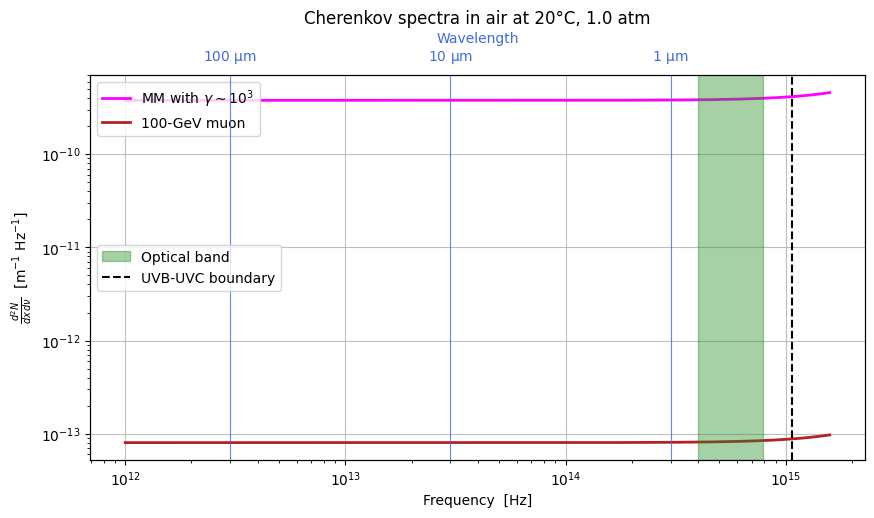

In [32]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(freqs, d2Ndxdnu_MM(freqs, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
ax1.plot(freqs, d2Ndxdnu(freqs, betas[-1]), c='firebrick', lw=2, label=r'100-GeV muon')
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2N}{dx\,d\nu}$  [m$^{-1}$ Hz$^{-1}$]')
ax1.set_title('Cherenkov spectra in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax1.legend(loc='upper left')
ax2.legend(loc='center left')
plt.show()

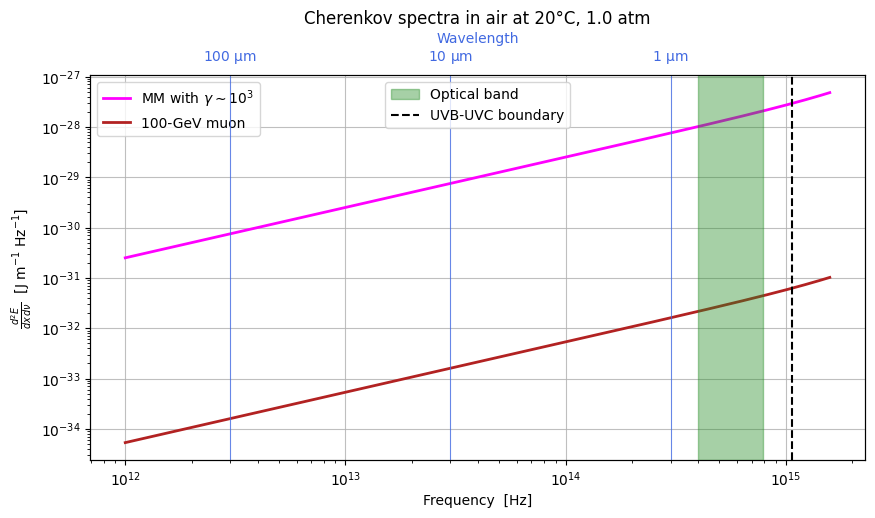

In [33]:
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(freqs, d2Edxdnu_MM(freqs, beta_MM), c='fuchsia', lw=2, label=r'MM with $\gamma \sim 10^3$')
ax1.plot(freqs, d2Edxdnu(freqs, betas[-1]), c='firebrick', lw=2, label=r'100-GeV muon')
ax2.axvspan(c.c.value / 750e-9, c.c.value / 380e-9, color='forestgreen', alpha=0.4, label='Optical band')
ax2.axvline(x=c.c.value / 280e-9, color='black', ls='--', lw=1.5, label='UVB-UVC boundary')

ax1.grid(alpha=0.8)
ax1.set_xlabel('Frequency  [Hz]')
ax1.set_ylabel(r'$\frac{d^2E}{dx\,d\nu}$  [J m$^{-1}$ Hz$^{-1}$]')
ax1.set_title('Cherenkov spectra in air at 20°C, 1.0 atm')

ax1.set_yscale('log')
ax1.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xscale('log')
ax2.xaxis.set_ticks_position('none') 
ax2.set_xticks(ticks=c.c.value / 10.**log_lam, color='royalblue',
               labels=[r'100 $\mathrm{\mu}$m', r'10 $\mathrm{\mu}$m', r'1 $\mathrm{\mu}$m'])
ax2.grid(alpha=0.8, color='royalblue')
ax2.set_xlabel('Wavelength', color='royalblue')

ax1.legend(loc='upper left')
ax2.legend(loc='upper center')
plt.show()

In [34]:
total_N = dNdx(0, 1.1e15, betas[-1]) / 100
print('Number of Cherenkov photons emitted per cm by a muon travelling through air with speed '
      + str(betas[-1]) + 'c:', total_N)

total_N_MM = dNdx_MM(0, 1.1e15, beta_MM) / 100
print('Number of Cherenkov photons emitted per cm by a magnetic monopole travelling through air with speed '
      + str(beta_MM) + 'c:', total_N_MM)

Number of Cherenkov photons emitted per cm by a muon travelling through air with speed 0.9999994418339737c: 0.9140873753150145
Number of Cherenkov photons emitted per cm by a magnetic monopole travelling through air with speed 0.999999499999875c: 4294.6397150641005


In [35]:
total_N_MM / total_N

4698.281401801522

In [36]:
total_E = dEdx(0, 1.1e15, betas[-1]) / 100 * u.J.to(u.eV)
print('Total energy radiated per cm by a muon travelling through air with speed '
      + str(betas[-1]) + 'c:', total_E, 'eV')

total_E_MM = dEdx_MM(0, 1.1e15, beta_MM) / 100 * u.J.to(u.eV)
print('Total energy radiated per cm by a magnetic monopole travelling through air with speed '
      + str(beta_MM) + 'c:', total_E_MM / 1e3, 'keV')

Total energy radiated per cm by a muon travelling through air with speed 0.9999994418339737c: 2.1131649948717306 eV
Total energy radiated per cm by a magnetic monopole travelling through air with speed 0.999999499999875c: 9.92829747544793 keV


In [37]:
total_E_MM / total_E

4698.306804978369